In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import curvelops as cv
from math import ceil, floor

'''from pylops.signalprocessing import FFT2D
from pylops.utils.tapers import taper2d
from scipy.signal import filtfilt'''

'from pylops.signalprocessing import FFT2D\nfrom pylops.utils.tapers import taper2d\nfrom scipy.signal import filtfilt'

In [2]:
fits_file = "/home/rabbit/CASSA_Internship/Month_01/16142/repro/work/img/16142b4_0.5-2_flux.img"

with fits.open(fits_file) as hdul:
    img_data = hdul[0].data
    if img_data.ndim > 2:
        img_data = img_data[0]

print("Image shape:", img_data.shape)

smoothed_img = gaussian_filter(img_data, sigma=1.0)

Image shape: (615, 875)


In [3]:
Cop = cv.FDCT2D(smoothed_img.shape)

coeffs = Cop @ smoothed_img.ravel()
threshold_factor = 4.0  # needs_reconsideration

coeffs_thr = coeffs.copy()
sigma = np.std(coeffs)
coeffs_thr[np.abs(coeffs) < threshold_factor * sigma] = 0.0
reconstructed = np.abs((Cop.H @ coeffs_thr).reshape(smoothed_img.shape))

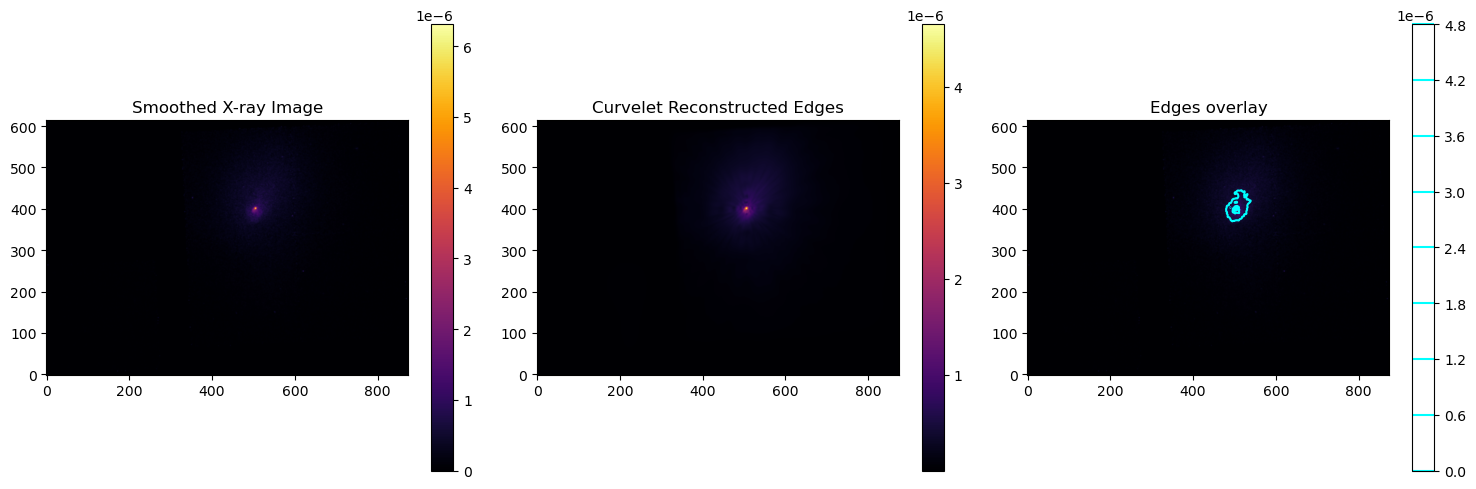

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(smoothed_img, origin='lower', cmap='inferno')
plt.title('Smoothed X-ray Image')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(reconstructed, origin='lower', cmap='inferno')
plt.title('Curvelet Reconstructed Edges')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(smoothed_img, origin='lower', cmap='inferno')
plt.contour(reconstructed, colors='cyan')
plt.title('Edges overlay')
plt.colorbar()

plt.tight_layout()
plt.show()